## Sylvester Brown
## Regis University
## Praticum II
### Spring 2020

### Purpose of project:
Showcase skills in data manipulation and engineering, exploratory data analysis, visualizations
and Machine leaning.


### The problems to solve are:

1. What factors are best for predicting that someone has diabetes?

2. Which machine learning tool is best for predicting the outcome?

### About the Dataset:
The dataset was contributed to Kaggle.com by Rahul. Data can be found at “https://www.kaggle.com/rahulsah06/machine-learning-for-diabetes-with-python”

### Other Resources used:

"Pandas for Everyone' by Daniel  Chen

https://www.kaggle.com/sagira/logistic-regression-math-behind-without-sklearn

https://www.kaggle.com/kwisatzhaderach/simple-mlp-approach

https://www.kaggle.com/aljojose/pima-indians-diabetes-my-first-project

https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

https://www.kaggle.com/saurav9786/eda-makes-sense

https://www.kaggle.com/uciml/pima-indians-diabetes-database

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Variables

#### Pregnancies                           -  Number of times pregnant
#### Glucose                                  - Plasma glucose concentration a 2 hours in an oral glucose tolerance test
#### BloodPressure                      - Diastolic blood pressure (mm Hg)
#### SkinThickness                      - Triceps skin fold thickness (mm)
#### Insulin                                    - 2-Hour serum insulin (mu U/ml)
#### BMI                                         - Body mass index (weight in kg/(height in m)^2)
#### DiabetesPedigreeFunction  - Diabetes pedigree function
#### Age                                         - Age (years)
#### Outcome                              

### Import Libraries

In [1]:
# import numpy, pandas. seaborn and matplotlib

import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

# import warnings filter
import warnings
warnings.filterwarnings('ignore')

### Upload Data

In [2]:
# Use pandas to read the csv file

data= pd.read_csv('C:/Users/spbro/OneDrive/Desktop/diabetes_data.csv') 

### Eploratory Data Analysis

In [3]:
# List the column names for the dataset
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
# drop DiabetesPedigreeFunction column. Description does not appear to 
# indicate what it really means and the purpose in the analysis 

data.drop(['DiabetesPedigreeFunction'],axis=1,inplace=True)

In [5]:
# use rename() to change column names

data = data.rename(columns = {'Pregnancies':'pregnancies'})
data = data.rename(columns = {'Glucose':'glucose'})
data = data.rename(columns = {'BloodPressure':'bloodpressure'})
data = data.rename(columns = {'Insulin':'insulin'})
data = data.rename(columns = {'Age':'age'})
data = data.rename(columns = {'Outcome':'outcome'})
data = data.rename(columns = {'SkinThickness':'skinthickness'})
data = data.rename(columns = {'BMI':'bmi'})

In [6]:
# Display first 5 rows

data.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,age,outcome
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,64,0,0,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1


In [7]:
# display columns 

data.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'age', 'outcome'],
      dtype='object')

In [8]:
# Display last 5 rows

data.tail()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,age,outcome
763,10,101,76,48,180,32.9,63,0
764,2,122,70,27,0,36.8,27,0
765,5,121,72,23,112,26.2,30,0
766,1,126,60,0,0,30.1,47,1
767,1,93,70,31,0,30.4,23,0


In [9]:
data.shape

# There are 768 rows and 9 columns

(768, 8)

In [10]:
# A statistical description of each column

data.describe()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,81.000000,1.000000


In [11]:
# check if data contains any null values

data.isnull().any()

pregnancies      False
glucose          False
bloodpressure    False
skinthickness    False
insulin          False
bmi              False
age              False
outcome          False
dtype: bool

In [12]:
# display more descriptive stats using .info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pregnancies    768 non-null    int64  
 1   glucose        768 non-null    int64  
 2   bloodpressure  768 non-null    int64  
 3   skinthickness  768 non-null    int64  
 4   insulin        768 non-null    int64  
 5   bmi            768 non-null    float64
 6   age            768 non-null    int64  
 7   outcome        768 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 48.1 KB


In [13]:
# how many instances of diabetes using count

data['outcome'].value_counts()

0    500
1    268
Name: outcome, dtype: int64

In [14]:
# Use groupby to explore number of people with diabetes per each observation using mean values

data.groupby('outcome').mean()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,age
outcome,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,37.067164


Although the data info shows that there are no missing values, I can tell that the data is skwed because of unusual number of zeros. It appears unsual that Glucose, BloodPressure, SkinThickness, Insulin, and BMI will have zeros. I will concentrate on these five attributes and  replace the zeros with NaN and then replace with the mean values.

In [15]:
#Replace 0 with NaN

d=data[['glucose','bloodpressure','skinthickness','insulin','bmi']]=data[['glucose','bloodpressure','skinthickness','insulin','bmi']].replace(0,np.nan)
d.head()

,glucose,bloodpressure,skinthickness,insulin,bmi
0,148.0,72.0,35.0,NaN,33.6
1,85.0,66.0,29.0,NaN,26.6
2,183.0,64.0,NaN,NaN,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1


In [16]:
#Replace NaN with mean values

data['glucose'].fillna(data['glucose'].median(),inplace=True)
data['bloodpressure'].fillna(data['bloodpressure'].median(),inplace=True)
data['skinthickness'].fillna(data['skinthickness'].median(),inplace=True)
data['insulin'].fillna(data['insulin'].median(),inplace=True)
data['bmi'].fillna(data['bmi'].median(),inplace=True)
data.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,age,outcome
0,6,148.0,72.0,35.0,125.0,33.6,50,1
1,1,85.0,66.0,29.0,125.0,26.6,31,0
2,8,183.0,64.0,29.0,125.0,23.3,32,1
3,1,89.0,66.0,23.0,94.0,28.1,21,0
4,0,137.0,40.0,35.0,168.0,43.1,33,1


## Data Visualization

## BAR PLOT

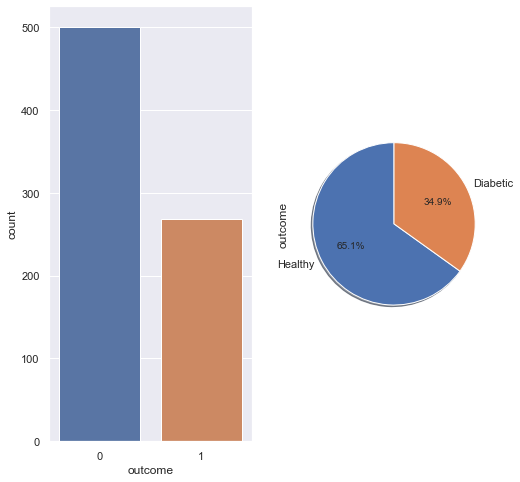

In [17]:
# The plot shows the amount of individuals that have diabetes and those who dont.

# countplot----Plot the frequency of the Outcome

fig1, ax1 = plt.subplots(1,2,figsize=(8,8))

#It shows the count of observations in each categorical bin using bars

sns.countplot(data['outcome'],ax=ax1[0])

#Find the % of diabetic and Healthy person

labels = 'Healthy', 'Diabetic'

data.outcome.value_counts().plot.pie(labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)

### BOXPLOTS

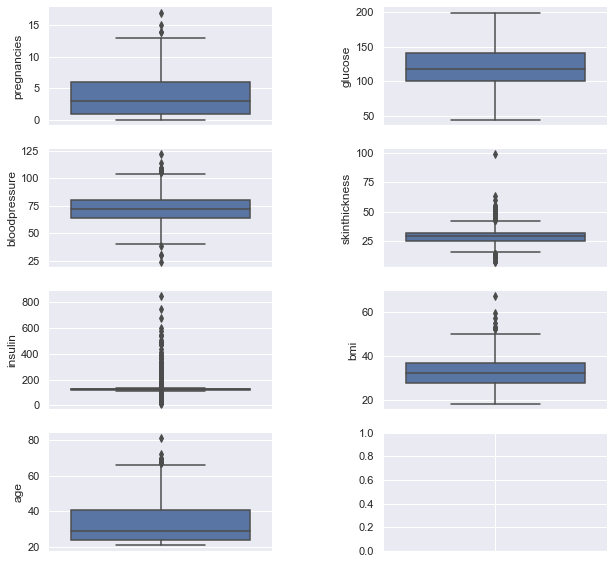

In [18]:
f, axes = plt.subplots(4,2, figsize=(10,10), sharex=True)

plt.subplots_adjust(wspace=0.5) # adjust the space between the plots

sns.despine(left=True)

# plot a boxplot of eacb observation to see if there are outliers

sns.boxplot( x= 'pregnancies',  data=data, orient='v',ax=axes[0,0])

sns.boxplot( x= 'glucose',  data=data, orient='v',ax=axes[0,1])

sns.boxplot( x= 'bloodpressure',  data=data, orient='v',ax=axes[1,0])

sns.boxplot( x= 'skinthickness',  data=data, orient='v',ax=axes[1,1])

sns.boxplot( x= 'insulin',  data=data, orient='v',ax=axes[2,0])

sns.boxplot( x= 'bmi',  data=data, orient='v',ax=axes[2,1])

sns.boxplot( x= 'age',  data=data, orient='v',ax=axes[3,0])

##  Observation


Although we have replaced zeros, the boxplots show outliers in all attributes.

## HISTOGRAM

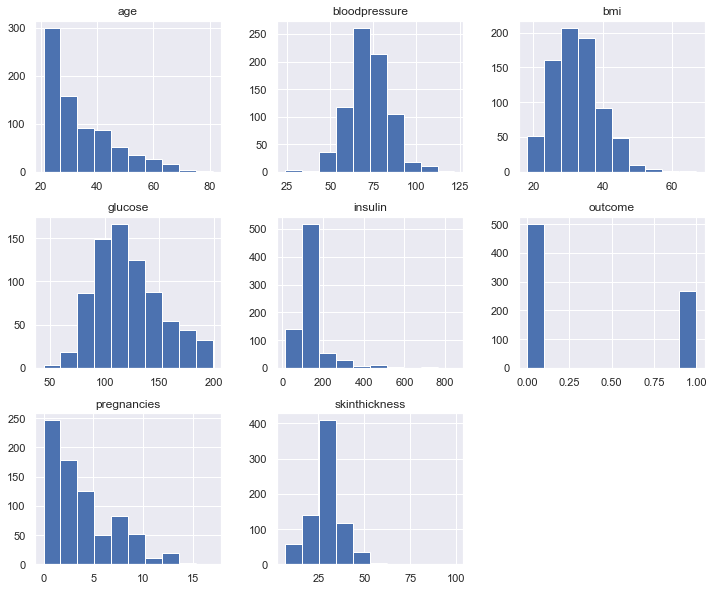

In [19]:
data.hist(figsize=(12,10));

## OBSERVATION

The plots show that Glucose, Blood Pressure, BMI are normally distributed.Pregnancies, Insulin,and Age are rightly skewed.

## CORRELATION PLOT

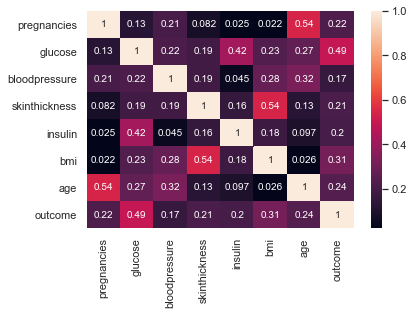

In [20]:
# corrlation matrix 

cor=data.corr()

# correlation plot---heatmap

sns.heatmap(cor,annot=True)

## OBSERVATION

This shows that glucose is the most correlated with the outcome. Also, bimi, insulin and age appear to be next on the correlation scale.

Other correlation pairs are pregnancy to age, insulin to glucose, bmi and skinthickness, age and glucose.

## MACHINE LEARNING (ML)

In [21]:
# Split data into X = observation and y = outcome

attributes = list(data.columns[:7])
X = data[attributes].values 
y= data['outcome'].values

from sklearn import preprocessing

# Get column names first
names = data.columns[:7]# Create the Scaler object
scaler = preprocessing.StandardScaler()# Fit your data on the scaler object
scaled_df = scaler.fit_transform(X)
X = pd.DataFrame(scaled_df, columns=names)

#### Use ExtraTreesClassifier to determine feature or observation importance

[0.10963028 0.28086509 0.10084644 0.10237593 0.09284294 0.16765796
 0.14578137]


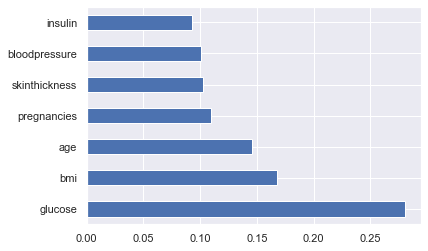

In [22]:

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## OBSERVATION

It was supprising to me based on reseach that insuline and blodpressure will be lower on the scale to predict the outcome. Pregnancy was a bit more of a prefered predictor of the outcome than bloodpressure. 
The attribute that has a better predictability of the outcome was glucose.

#### Given that most of the observations were skewed, I decided to standardize the dataset in preparation for machine learning. This will be simply achived using StandardScaler from Sklearn.preprocessing.

In [23]:
# Split into train and test sets for machine learning.
# test set was split at 20% and random_state set to 42

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

## MODELS for ML

In [24]:
# Import suite of algorithms.
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.calibration import CalibratedClassifierCV

In [25]:
# Create objects of required models.
models = []
models.append(("KNN",KNeighborsClassifier()))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("QDA",  QuadraticDiscriminantAnalysis()))
models.append(("AdaBoost", AdaBoostClassifier()))
models.append(("SVM Linear",SVC(kernel="linear")))
models.append(("Random Forest",  RandomForestClassifier()))
models.append(("Bagging",BaggingClassifier()))

In [26]:
# Find accuracy of models.
results = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=123)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
    results.append(tuple([name,cv_result.mean(), cv_result.std()]))
  
results.sort(key=lambda x: x[1], reverse = True)    
for i in range(len(results)):
    print('{:20s} {:2.2f} (+/-) {:2.2f} '.format(results[i][0] , results[i][1] * 100, results[i][2] * 100))

SVM Linear           75.41 (+/-) 4.19 
Bagging              75.09 (+/-) 2.93 
AdaBoost             75.08 (+/-) 4.48 
Random Forest        73.95 (+/-) 3.48 
QDA                  73.78 (+/-) 6.01 
KNN                  73.30 (+/-) 6.82 
DecisionTree         71.99 (+/-) 4.22 


## FIND BEST PARAMETERS TO OPTIMIZE BEST MODEL

In [27]:
### SVM Linear was the best model.
### find the parameters for SVM that will optimize the model
### using GridSearchCV.


from sklearn.model_selection import GridSearchCV
model = SVC()
paramaters = [
             {'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel' : ['linear']}                                       
             ]
grid_search = GridSearchCV(estimator = model, 
                           param_grid = paramaters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_ 
best_parameters = grid_search.best_params_  

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )

Best accuracy :  0.758957654723127
Best parameters : {'C': 0.01, 'kernel': 'linear'}


C = It controls the trade off between smooth decision boundary and classifying training points correctly. A large value of c means you will get more training points correctly.

Kernel = type of hyperplane used to separate the data


## OPTIMIZE MODEL

### Use the Best parameters : {'C': 0.01, 'kernel': 'linear'} to optimize the model

In [28]:
# Predict output for test set. 
final_model = SVC(C = 0.01, kernel = 'linear')
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

[[87 12]
 [23 32]]
77.27272727272727
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        99
           1       0.73      0.58      0.65        55

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154



### Machine learning with Added Column  - random numbers

In [29]:
# copy and modify original dataset for analysis
data2 = data

np.random.seed(42)

# create new column with the random number generator

data2['randNumCol'] = np.random.randint(10,40, size=len(data2))

In [30]:
# Rearrage columns so it is easier to split X and Y for analysis

data2=data2[['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'age', 'randNumCol', 'outcome']]

In [31]:
# display first five rows
data2.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,age,randNumCol,outcome
0,6,148.0,72.0,35.0,125.0,33.6,50,16,1
1,1,85.0,66.0,29.0,125.0,26.6,31,29,0
2,8,183.0,64.0,29.0,125.0,23.3,32,38,1
3,1,89.0,66.0,23.0,94.0,28.1,21,24,0
4,0,137.0,40.0,35.0,168.0,43.1,33,20,1


In [32]:
# Split new data into X = observation and y = outcome

attributes = list(data2.columns[:8])
X = data2[attributes].values 
y= data2['outcome'].values

from sklearn import preprocessing

# Get column names first
names = data2.columns[:8]# Create the Scaler object
scaler = preprocessing.StandardScaler()# Fit your data on the scaler object
scaled_df = scaler.fit_transform(X)
X = pd.DataFrame(scaled_df, columns=names)

[0.10138801 0.25342595 0.09905497 0.08679671 0.06879194 0.1451958
 0.15091407 0.09443254]


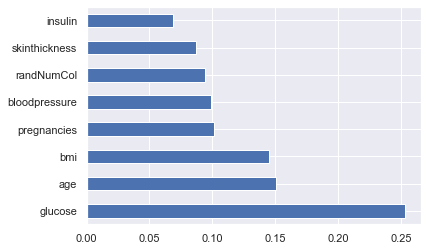

In [33]:
# Use ExtraTreesClassifier to determine order of importance for attributes.

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### OBSERVATION

The attributes that show up after the random number attribute shows the cut of teh feature importance. This appears to indicate that the 
random number attribute is a better predictor of the outcome than the attributes that come after that.

In [34]:
# drop all attributes that placed below and including the random number column

X.drop(['insulin', 'skinthickness', 'randNumCol'],axis=1,inplace=True)

In [35]:
X.head()

,pregnancies,glucose,bloodpressure,bmi,age
0,0.639947,0.866045,-0.031990,0.166619,1.425995
1,-0.844885,-1.205066,-0.528319,-0.852200,-0.190672
2,1.233880,2.016662,-0.693761,-1.332500,-0.105584
3,-0.844885,-1.073567,-0.528319,-0.633881,-1.041549
4,-1.141852,0.504422,-2.679076,1.549303,-0.020496


In [36]:
# Split feature importamce attributes into train and test sets for machine learning.
# test set was split at 20% and random_state set to 42

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [37]:
# Use Optimized model of ML to test prediction of the feature importance attributes.
# Predict output for test set. 
final_model = SVC(C = 0.1, kernel = 'linear')
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

[[85 14]
 [20 35]]
77.92207792207793
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        99
           1       0.71      0.64      0.67        55

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.75       154
weighted avg       0.78      0.78      0.78       154



### Compare the two Predictions

The model improved after removing attributes that appear to not contribute much to the prediction. It incressed from about 76% to 78%. Upon closer observation it appears that the imporovement in the model was only reflected in prdiction True negatives.Therefore it was not  a significant change when the features or attributes were taken out. Further, given that the "C" paramenter in SVM linear is used to determine how acurate a prediction should be versus the smoothness level of the classifications, a higher value of "C" provides stonger accuracy in predictions. This appears to explain why myb accuracy for the model is at about 78%.